# Carregando Dataset:

In [6]:
import numpy as np

paths = [
    "data/processed/CeraDePolietileno-633nm.txt",
    "data/processed/CeraDePolietileno-785nm.txt",
    "data/processed/PE_glicol_mm4000.txt",
    "data/processed/PE_glicol_mm10000.txt",
    "data/processed/Policaprolactona.txt",
    "data/processed/Poliisopreno_trans_633nm.txt",
    "data/processed/Poliisopreno_trans_785nm.txt",
    "data/processed/Polipropileno.txt"
]

for i, path in enumerate(paths):
    data = np.loadtxt(path, delimiter='\t')
    x_points = data[:, 1]
    if i == 0:
        x_array = np.array([x_points])
    else:
        x_array = np.vstack((x_array, x_points))

print(x_array.shape)

(8, 1600)


# Reduzindo Dimensionalidade (PCA):

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_polymers = pca.fit_transform(x_array)

print(pca_polymers)

[[-0.24876606 -1.35540084]
 [-1.37598574 -1.08311463]
 [-4.45418754  4.09187086]
 [-3.49170584  3.92888436]
 [14.19914928  1.21765767]
 [-0.94858478 -2.89963566]
 [-3.65105388 -2.75085208]
 [-0.02886544 -1.14940968]]


# Plotando os vetores reduzidos dos espectros dos polímeros:

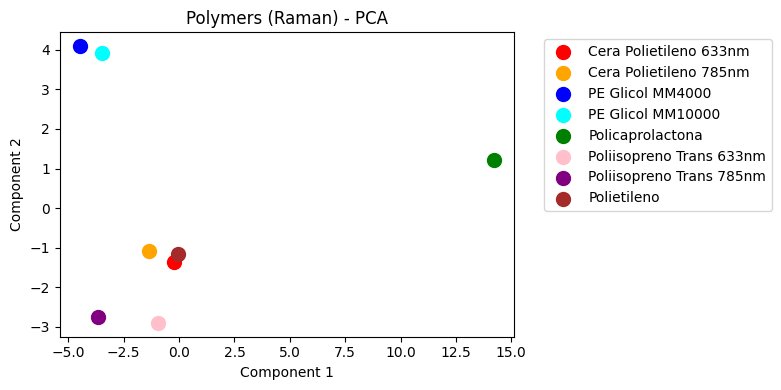

In [11]:
import matplotlib.pyplot as plt

X = pca_polymers[:, 0]
Y = pca_polymers[:, 1]

names = ["Cera Polietileno 633nm", "Cera Polietileno 785nm", "PE Glicol MM4000", "PE Glicol MM10000", 
"Policaprolactona", "Poliisopreno Trans 633nm", "Poliisopreno Trans 785nm", "Polietileno"]
colors = ["red", "orange", "blue", "cyan", "green", "pink", "purple", "brown"]

plt.figure(figsize=(8, 4))
for xi, yi, nome, cor in zip(X, Y, names, colors):
    plt.scatter(xi, yi, color=cor, s=100, label=nome)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Polymers (Raman) - PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()